# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
n = [10,20,50,100,1000]
list_A = []
list_b = []
for i in n:
    list_A.append(main.random_matrix_Ab(i)[0])
    list_b.append(main.random_matrix_Ab(i)[1])


***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

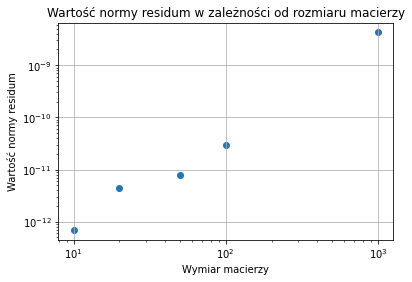

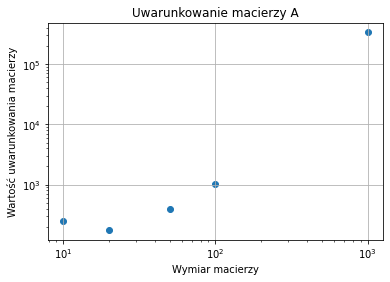

In [3]:

solve_list = []
for i in range(len(n)):
    solve_list.append(np.linalg.solve(list_A[i],list_b[i]))
    
res_norm = []
for i in range(len(n)):
    res_norm.append(main.residual_norm(list_A[i],solve_list[i],list_b[i]))


plt.scatter(n,res_norm)
plt.title("Wartość normy residum w zależności od rozmiaru macierzy")
plt.xlabel('Wymiar macierzy')
plt.ylabel("Wartość normy residum")
plt.loglog()
plt.grid()



cond_list = []
for i in range(len(n)):
    cond_list.append(np.linalg.cond(list_A[i]))
plt.figure()
plt.scatter(n,cond_list)
plt.title('Uwarunkowanie macierzy A')
plt.xlabel('Wymiar macierzy')
plt.ylabel('Wartość uwarunkowania macierzy')
plt.loglog()
plt.grid()

                      
    
#Z wykresów możemy odczytać, że norma residumm jest zależna od rozmiaru macierzy, co zgadza się z teorią.


***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [4]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [5]:
res_A_norm = []
res_A_low = []
res_A_gre = []

res_ans_norm = []
res_ans_low = []
res_ans_gre = []

for i in range(len(n)):
    # Rekonstrukcja macierzy dla różnych wektorów singularnych
    res_A_norm.append(main.create_matrix_from_A(list_A[i], main.log_sing_value(len(list_A[i][0]), 1, 10)))
    res_A_low.append(main.create_matrix_from_A(list_A[i], main.order_sing_value(len(list_A[i][0]), 10, 'low')))
    res_A_gre.append(main.create_matrix_from_A(list_A[i], main.order_sing_value(len(list_A[i][0]), 10, 'gre')))
    
    # Rozwiązanie układu równań dla zrekonstruowanej macierzy
    res_ans_norm.append(nplin.solve(res_A_norm[i], list_b[i]))
    res_ans_low.append(nplin.solve(res_A_low[i], list_b[i]))
    res_ans_gre.append(nplin.solve(res_A_gre[i], list_b[i]))

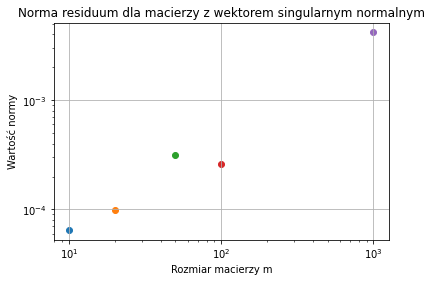

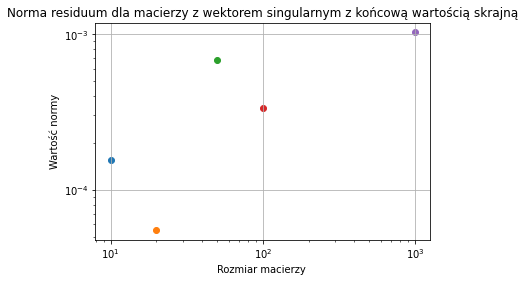

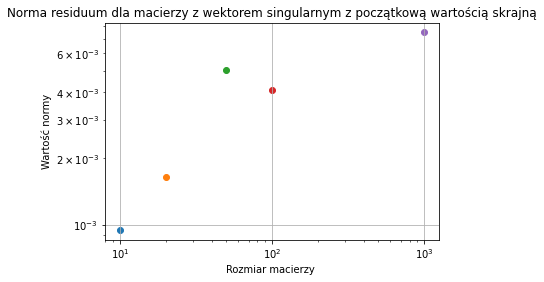

In [6]:
# Wykresy normy residuów    
    
for i in range(len(n)):
    plt.scatter(n[i], main.residual_norm(res_A_norm[i], res_ans_norm[i], list_b[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym normalnym')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(n)):
    plt.scatter(n[i], main.residual_norm(res_A_low[i], res_ans_low[i], list_b[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym z końcową wartością skrajną')
plt.xlabel('Rozmiar macierzy ')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()  

for i in range(len(n)):
    plt.scatter(n[i], main.residual_norm(res_A_gre[i], res_ans_gre[i], list_b[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym z początkową wartością skrajną')
plt.xlabel('Rozmiar macierzy ')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()

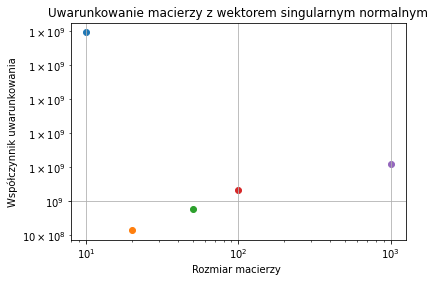

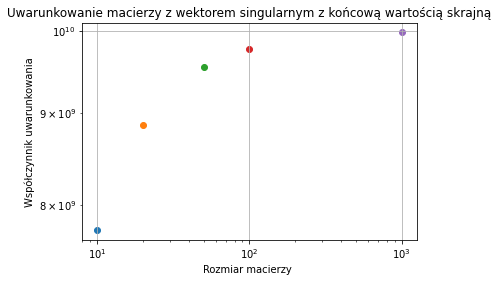

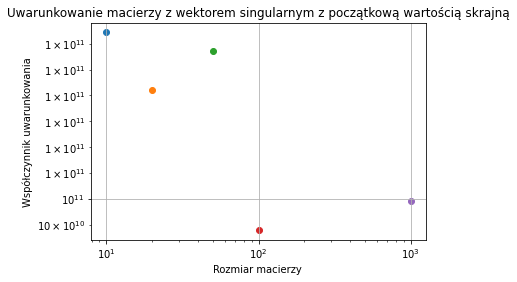

In [7]:
# Wykresy funkcji uwarunkowania macierzy

for i in range(len(n)):
    plt.scatter(n[i], nplin.cond(res_A_norm[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym normalnym')
plt.xlabel('Rozmiar macierzy ')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(n)):
    plt.scatter(n[i], nplin.cond(res_A_low[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym z końcową wartością skrajną')
plt.xlabel('Rozmiar macierzy ')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(n)):
    plt.scatter(n[i], nplin.cond(res_A_gre[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym z początkową wartością skrajną')
plt.xlabel('Rozmiar macierzy ')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




Nie musimy obliczać całej macierzy, ponieważ w obecnej sytuacji mamy jej wartości singularne. Dzięki temu możemy wyznaczyć współczynnik uwarunkowania dzieląc największą wartość singularną przez najmniejszą.

Wnioski:

Na tym laboratorium zapoznałem się z najprostszym sposobem rozwiązywania równań macierzowych,gdy liczba równań jest równa liczbie niewiadomych, a same równania są linowe. Omówiliśmy zagadnienie dekompozycji macierzy na wartości singularne,która jest swego rodzaju odpowiednikiem diagonalizacji dla macierzy prostokątnych. Określiliśmy normy macierzy, które mówią nam o tym jak maksymalnie macierz wpływa na wektor oraz uwarunkowanie macierzy dające nam informacje o błędach występujących w danym rozwiązaniu numerycznym problemu. Są to ważne informacje potrzebne wszędzie tam, gdzie korysta się z algebry liniowej w programowaniu.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)